## Learning outcomes
1. Load, display and save images
2. Load, show and save videos
3. Image resizing

## Why OpenCV
- Large community support, i.e you can find a lot of resources online.
- Compatible with several OS, MacOS, windows and linux. Can be written with C++, Python and Java Languages
- Interperable with Numpy module, thereby fast compuation and mathematical operations on image array.

## Setup

In [1]:
import sys
# Minimum Python 3.7
assert sys.version_info >= (3, 11)

import numpy as np
import cv2 as cv # useOptimized() has been enabled

## Image formats
- TIF (.tif)
    * good for printing, great depth level, large file size
- bmp (.bmp)
    * large file size
- gif (.gif) (OpenCV cannot handle)
    * animation, shallow color depth
- jpeg (.jpeg, .jpg, .jfif)
    * photo
- PNG (.png)
    * website
- webp (.webp)
    * website, samller file size compared to png and jpeg, not supported by all the browsers

In [2]:
img = cv.imread("images/lena.jfif")
img_grayscale = cv.imread("images/lena.jfif", 0)
# 0 is for grayscale, -1: cv.UNREAD_UNCHANGES, 1 (Default)

cv.imshow("lena_color", img)
cv.imshow("lena_grayscale", img_grayscale)
cv.waitKey(0) #keyboard binding function, wait for user response
cv.destroyAllWindows()

In [2]:
def show_img(window_name, img):
    "Arguments: window_name and img"
    cv.imshow(window_name, img)
    cv.waitKey(0) #keyboard binding function, wait for user response
    cv.destroyAllWindows()

In [4]:
img = cv.imread("images/lena.png")

show_img("lena", img)

In [5]:
# Show difference between jpeg and png images
img_jpeg = cv.imread('images/lena.jfif', -1)
img_png = cv.imread('images/lena.png', -1)

print(f"The shape of the jpg image: {img_jpeg.shape}")
print(f"The shape of the png image: {img_png.shape}")

The shape of the jpg image: (225, 225, 3)
The shape of the png image: (225, 225, 4)


In [6]:
!pip install imageIo

In [7]:
import imageio

GIF = imageio.mimread("images/rotating_earth_large.gif")
# convert RGB to BGR
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in GIF]

# show_img("gif", img[0]) # show the first image

for img in imgs:
    cv.imshow("GIF", img)
    cv.waitKey(150) # wait 150ms for user input
    
cv.destroyAllWindows()

### save images

cv.imwrite(filename, img)


In [8]:
# a good way to load, display and save images
img = cv.imread(cv.samples.findFile("images/lena.jfif"))

if img is None:
    sys.exit('No such filepath!')
    
cv.imshow("img", img)
k = cv.waitKey(0) & 0xFF #
if k == 115:
    cv.imwrite("lena_save.jpg", img)
    
cv.destroyAllWindows()

## basic operation on videos
Video is basicallt sequences of images.

### Load and display videos with OpenCV

In [9]:
# Initiate an object
cap = cv.VideoCapture("video/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("The video filepath is not correct")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
    
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
cv.destroyAllWindows()

In [25]:
# use webcam, get the video and save it on local disk
cap = cv.VideoCapture(0)

if not cap.isOpened():
    sys.exit("No webcam is detected")

#filename, fourcc, fps, frame size
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 15
w, h = int(cap.get(3)), int(cap.get(4))
out = cv.VideoWriter("video/out.avi", fourcc, fps, (w, h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
    
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

cap.release()
out.release()
cv.destroyAllWindows()

SystemExit: No webcam is detected

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [11]:
cap = cv.VideoCapture(0)
print(f"FPS of webcam: {cap.get(5)}")

FPS of webcam: 0.0


In [12]:
import time

In [13]:
# Initiate an object
cap = cv.VideoCapture("video/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("The video filepath is not correct")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
start = time.time()
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
    
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

end = time.time()
# cap.release()
cv.destroyAllWindows()

In [14]:
print(f"The fps: {cap.get(5)}")
n_frames = cap.get(7)
print(f"The estimated fps using OpenCV: {n_frames / (end-start)}")

The fps: 60.0
The estimated fps using OpenCV: 3349.35452589019


## Image resizing

There are 2 ways to do large resizing:
1. specify the desired imaage width and height
2. scale factor (maintain the aspect ratio)

    cv.resize(img, (x_new, y_new), fx, fy, interpolation)

The default interpolation is blinear interpolation.

In [15]:
img = cv.imread("images/soccer.jpg")

new_height = 300
new_width = 450

img_resize = cv.resize(img, (new_width, new_height))

cv.imshow("original", img)
show_img("resize", img_resize)

In [16]:
img.shape

(1200, 800, 3)

In [17]:
# 2nd method: scale factor
img = cv.imread("images/lena.jfif")

img_resize = cv.resize(img, None, fx= 1.5, fy=1.5)

cv.imshow("original", img)
show_img("resize", img_resize)

## Exercises
1. Load and display the image 'dog.jfif'. Save the image in png format.
2. Suggest 2 ways and write codes to display 2 images simultaneously. You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.
3. Write codes that performs the following:
Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"
4. Enlarge the image "dog.jfif" by using different techniques: 1) Linear interpolation, 2) Cubic interpolation and 3) nearest neighbor interpolation. Comment on the upscaled of all the outputs.

In [5]:
# Question 1
# Load and display the image 'dog.jfif'. Save the image in png format.

img = cv.imread(cv.samples.findFile("images/dog.jfif"))

cv.imshow("dog", img)
k = cv.waitKey(0) & 0xFF #
if k == 115:
    cv.imwrite("dog_save.png", img)
    
cv.destroyAllWindows()

In [4]:
# Question 2
# Suggest 2 ways and write codes to display 2 images simultaneously. 
#You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. 
#The 2 images are original color image and its corresponding grayscale image.

img = cv.imread("images/lena.jfif")
img_grayscale = cv.imread("images/lena.jfif", 0)

cv.imshow("lena", img)
show_img("grayscale", img_grayscale)

In [5]:
#2nd way: matplotlib
import matplotlib.pyplot as plt

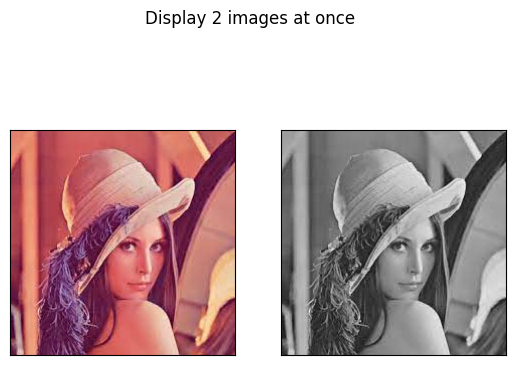

In [6]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img_grayscale, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("Display 2 images at once")
plt.show()

In [7]:
# convert the grayscale to bgr
img_gray_bgr = cv.cvtColor(img_grayscale, cv.COLOR_GRAY2BGR)

img_combined = np.hstack([img, img_gray_bgr])

show_img("img_combined", img_combined)

In [28]:
#Question 3
#Write codes that performs the following: Load the video “img_pexels.mp4” into the Python environment, 
#resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). 
#You can specify an arbitrary frame rate. Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"
# Initiate an object
cap = cv.VideoCapture("video/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("The video filepath is not correct")

#filename, fourcc, fps, frame size
#Define the video width & height
new_w = 350
new_h = 200
fps = 30
fourcc = cv.VideoWriter_fourcc(*'mp4v')  # mp4 format
out = cv.VideoWriter("video/smaller_img_pexels.mp4", fourcc, fps, (new_w, new_h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
    
    #resize the width and height
    video_resize = cv.resize(frame, (new_w, new_h))
    cv.imshow("frame", video_resize)
    #write the resized video file
    out.write(video_resize)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
                     
cap.release()
out.release()
cv.destroyAllWindows()

In [43]:
#Question 4
#Enlarge the image "dog.jfif" by using different techniques: 1) Linear interpolation, 
#2) Cubic interpolation and 3) nearest neighbor interpolation. Comment on the upscaledof all the outputs.
img = cv.imread("images/dog.jfif")

# Linear interpolation calculates the new pixel values as a weighted average of the surrounding pixels.
# It will produce a smoother image.
linear_img = cv2.resize(img,None, fx = 3, fy = 3, interpolation = cv.INTER_LINEAR)

# Cubic interpolation uses a cubic convolution algorithm to estimate the new pixel values based on surrounding pixels.
# It will produce a smoother and sharper image compared to linear interpolation, but it require more computation.
cubic_img = cv2.resize(img,None, fx = 3, fy = 3, interpolation = cv.INTER_CUBIC)

# Nearest neighbor interpolation will select the nearest pixel value from the original image while resizing.
# It may produce a blocky image.
near_img = cv.resize(img ,None, fx = 3, fy = 3, interpolation = cv.INTER_NEAREST)

#show the image
cv.imshow('Upscaled Image (Linear)', linear_img)
cv.imshow('Upscaled Image (Cubic)', cubic_img)
cv.imshow('Upscaled Image (Nearest Neighbor)', near_img)

cv.waitKey(0)
cv.destroyAllWindows()